# Part I - Ford GoBike System - Dataset Exploration

## by Bashar Hammouri

## Introduction

This dataset includes information about individual rides made in a bike-sharing system in February 2019 covering the greater San Francisco Bay area. This dataset includes trip durations, station locations, and anonymized user demographics for analytical purposes. The following are the variables and describtion of each one:
* duration_sec: The total time, in seconds, that a bike trip lasted from its start to its end.

* start_time: The date and time when a bike trip started.

* end_time: The date and time when a bike trip ended.

* start_station_id: The station where a particular bike trip started.

* start_station_name: The full name of the station where the bike trip started.

* start_station_latitude: The geographical latitude coordinate of the starting station.

* start_station_longitude: The geographical longitude coordinate of the starting station.

* end_station_id: The station where a particular bike trip ended.

* end_station_name: The full name of the station where the bike trip ended.

* end_station_latitude: The geographical latitude coordinate of the ending station.

* end_station_longitude: The geographical longitude coordinate of the ending station.

* bike_id: The unique ID identifies the specific bicycle used for the trip.

* user_type: The type of user, typically 'Customer' (casual riders) and 'Subscriber' (members).

* member_birth_year: The birth year of the user who took the trip.

* member_gender: The gender of the user.

* bike_share_for_all_trip: This indicates whether the trip was part of a special "Bike Share for All" program, typically 'Yes' or 'No'.

## Preliminary Wrangling

In [78]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
#Load the dataset.
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')

#Print the first 5 records in the bike dataframe.
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [80]:
#Returns info about the bike dataframe including the number of non-null values.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [81]:
#Returns summary statistics of the bike dataframe, including mean, count, etc.
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

The dataset contains (183,412) rows and (16) columns, the `duration_sec` and `bike_id` datatype is int64, `start_time`, `end_time`, `start_station_name`, `end_station_name`, `user_type`, `member_gender` and `bike_share_for_all_trip` datatype is object or string, and `start_station_id`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_latitude`, `end_station_longitude` and `member_birth_year` datatype is float64. 

On the other hand, There are missing values in `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year` and `member_gender`. 


### What is/are the main feature(s) of interest in your dataset?

Mainly, the features of interest in this dataset may be the `duration_sec`, `user_type` and `member_gender`. The first feature will help in understanding the trip duration, while the last two features are important in segmenting users based on their type and identifying the gender of bike users.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features in the dataset will help support investigating the main features of interest:

* `start_time` and `end_time`, these two features are important in deriving features like hour of day and day of week, in order to understand the time of the trips to identify the peak time and the relation with the `duration_sec`, `user_type` and `member_gender`.

* `member_birth_year`, this feature will enhance the demographic information about the users, which could be used in investigating how the `duration_sec`, `user_type`, and `member_gender` vary across different age groups.

## Data Preprocessing

The following are some steps to preprocess the dataset before investigating the features of interest:

In [82]:
#Convert both 'start_time' and 'end_time' to datetime instead of object.
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

In [83]:
#Create a new column called 'start_hour' extracting the hour from a datetime.
bike_df['start_hour'] = bike_df['start_time'].dt.hour

In [84]:
#Create a new column called 'start_day' extracting the day name from a datetime.
bike_df['start_day'] = bike_df['start_time'].dt.day_name()

In [85]:
#Reorder the days of the week.
ordered_days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
bike_df['start_day'] = pd.Categorical(bike_df['start_day'], categories=ordered_days, ordered=True)

In [86]:
#Create a new column called 'duration_min' includes the trip duration in minutes.
bike_df['duration_min'] = bike_df['duration_sec']/60

In [87]:
#Create a new column called 'member_age' calculating the age from the 'member_birth_year'.
bike_df['member_age'] = 2019 - bike_df['member_birth_year']

In [88]:
#Move the new column 'duration_min' to position 1 (second column).
min_col = bike_df.pop('duration_min')  # Remove column and get its values
bike_df.insert(1, 'duration_min', min_col)  # Insert at new position

In [89]:
#Move the new column 'start_hour' to position 3 (forth column).
hour_col = bike_df.pop('start_hour')  # Remove column and get its values
bike_df.insert(3, 'start_hour', hour_col)  # Insert at new position

In [90]:
#Move the new column 'start_day' to position 4 (fifth column).
day_col = bike_df.pop('start_day')  # Remove column and get its values
bike_df.insert(4, 'start_day', day_col)  # Insert at new position

In [91]:
#Move the new column 'member_age' to position 17 (eighteenth column).
age_col = bike_df.pop('member_age')  # Remove column and get its values
bike_df.insert(17, 'member_age', age_col)  # Insert at new position

In [92]:
#Convert both 'start_station_id' and 'end_station_id' to Int32 instead of float64.
bike_df['start_station_id'] = bike_df['start_station_id'].astype('Int32')
bike_df['end_station_id'] = bike_df['end_station_id'].astype('Int32')

In [93]:
#Convert both 'member_birth_year' and 'member_age' to Int32 instead of float64.
bike_df['member_birth_year'] = bike_df['member_birth_year'].astype('Int32')
bike_df['member_age'] = bike_df['member_age'].astype('Int32')

In [94]:
#Create a new cleaned dataframe from the original bike dataframe
#excluding all records with Null values in any column.
cleaned_bike_df = bike_df.dropna().reset_index(drop=True)

In this section, a preprocessing operations were executed to provide a cleaned data ready to be investigated and analyze. These operations were as the following:
1. Convert the data type for both the `start_time` and the `end_time` from `object` to `datetime`.
2. Create a new column in the dataframe called `start_hour`, through extracting the hour from a datetime.
3. Create a new column in the dataframe called `start_day`, through extracting the day name from a datetime. Then reorder the days of the week starting from 'Sunday' to 'Saturday', and convert it's data type into Category.
4. Create a new column in the dataframe called `duration_min`, includes the trip duration in minutes. Values in this column were calculated by deviding values in the `duration_min` by 60.
5. Create a new column in the dataframe called `member_age`, includes the age of each member. Values in this column were calculated by substracting values in the `member_birth_year` from the current year of the data collection, which was (**2019**).
6. Convert the data type of `start_station_id`, `end_station_id`, `member_birth_year` and `member_age` from `float64` into `Int32`.
7. Reorder the new created columns to be next to the column extracted from.
8. Create a new cleaned dataframe called `created_bike_df` from the original dataframe `bike_df`, excluding all records with Null values in any column.

In [95]:
#Print the first 5 records in the cleaned bike dataframe.
cleaned_bike_df.head()

,duration_sec,duration_min,start_time,start_hour,start_day,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_age,member_gender,bike_share_for_all_trip
0,52185,869.750000,2019-02-28 17:32:10.145,17,Thursday,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,35,Male,No
1,61854,1030.900000,2019-02-28 12:13:13.218,12,Thursday,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,47,Male,No
2,36490,608.166667,2019-02-28 17:54:26.010,17,Thursday,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,30,Other,No
3,1585,26.416667,2019-02-28 23:54:18.549,23,Thursday,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,45,Male,Yes
4,1793,29.883333,2019-02-28 23:49:58.632,23,Thursday,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,60,Male,No


In [96]:
#Returns info about the bike cleaned dataframe including the number of non-null values.
cleaned_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   duration_min             174952 non-null  float64       
 2   start_time               174952 non-null  datetime64[ns]
 3   start_hour               174952 non-null  int32         
 4   start_day                174952 non-null  category      
 5   end_time                 174952 non-null  datetime64[ns]
 6   start_station_id         174952 non-null  Int32         
 7   start_station_name       174952 non-null  object        
 8   start_station_latitude   174952 non-null  float64       
 9   start_station_longitude  174952 non-null  float64       
 10  end_station_id           174952 non-null  Int32         
 11  end_station_name         174952 non-null  object        
 12  end_station_lati

## Univariate Exploration

In this section, will investigate distributions of individual variables, in order to see unusual points or outliers, and take a deeper look to clean things up.

Here, I started investigating the distribution of the trip duration in seconds, to know what is the typical `duration_sec` of a bike trip, and how does it vary?

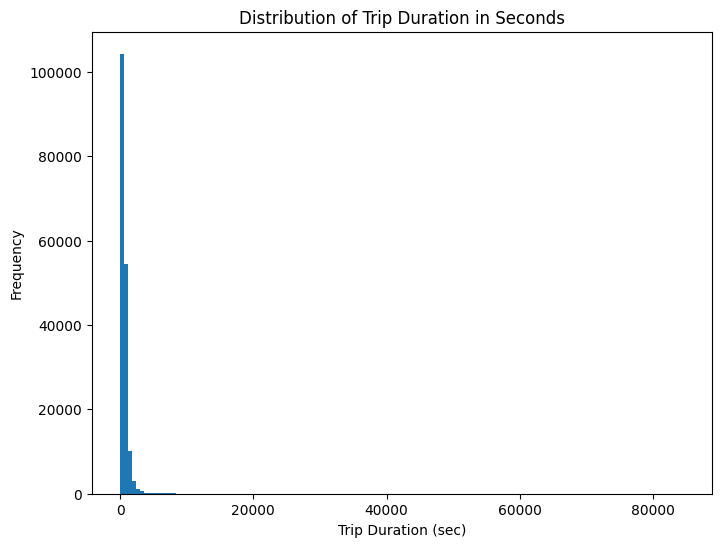

In [97]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 600
bins = np.arange(0, cleaned_bike_df['duration_sec'].max()+binsize, binsize)

#Plot a histogram for the distribution of the trip duration in seconds. 
plt.hist(data = cleaned_bike_df, x= 'duration_sec', bins=bins)
plt.title('Distribution of Trip Duration in Seconds')
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Frequency')
plt.show()

Based on the previous histogram and the statistics provided using the `describe()` function, it's obvious that the distribution of trip duration is right-skewed, and the majority of trips are short.

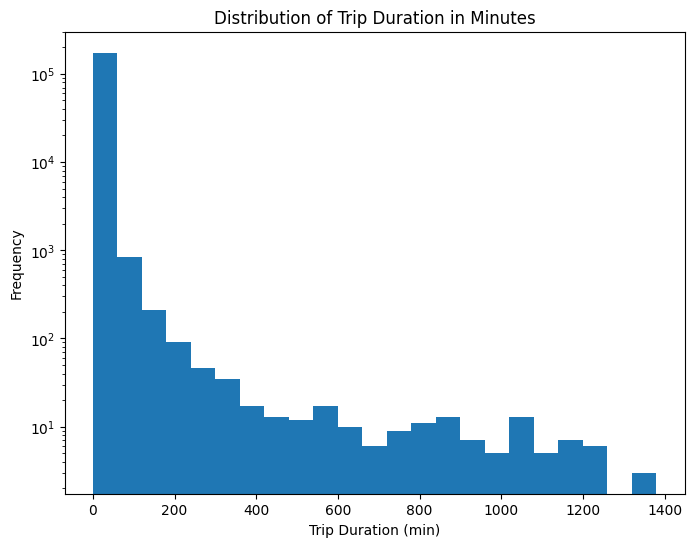

In [98]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 60
bins = np.arange(0, cleaned_bike_df['duration_min'].max(), binsize)

#Plot a histogram for the distribution of the trip duration in minutes. 
plt.hist(data = cleaned_bike_df, x= 'duration_min', bins=bins)
plt.title('Distribution of Trip Duration in Minutes')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

In [99]:
#Drop rows include trip durations over 1200 minutes.
cleaned_bike_df = cleaned_bike_df[cleaned_bike_df['duration_min'] <= 1200]

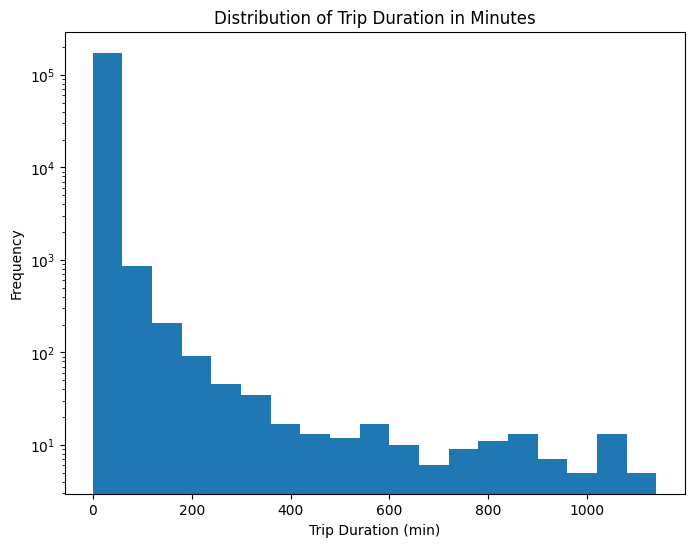

In [100]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 60
bins = np.arange(0, cleaned_bike_df['duration_min'].max(), binsize)

#Plot a histogram for the distribution of the trip duration in minutes. 
plt.hist(data = cleaned_bike_df, x= 'duration_min', bins=bins)
plt.title('Distribution of Trip Duration in Minutes')
plt.xlabel('Trip Duration (min)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

After investigating the trip duration in seconds shown in the first histogram and the trip duration in minutes shown in the second histogram, the distribution of the trip duration in the dataset is highly right-skewed, and the majority of trips are relatively short (under 20 minutes), with a long tail representing longer durations.

Next, the user type (`user_type`) distribution will be investigated, to know which user type ('Subscriber' or 'Customer) is the most dominant?

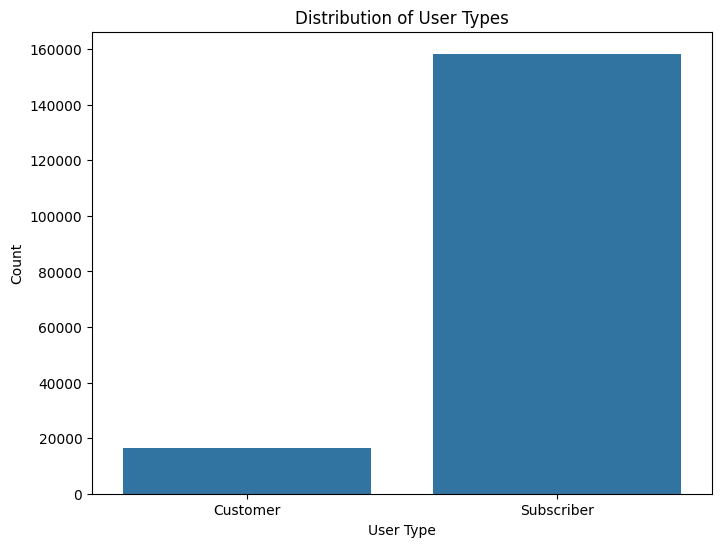

In [101]:
plt.figure(figsize=(8, 6))

#Plot a countplot for the distribution of the user type. 
sns.countplot(data=cleaned_bike_df, x='user_type')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

After investigating the user type (`user_type`), it's obvious that the 'Subscriber' is the dominant user type in this dataset with higher than **150k** users by a significant margin compared to 'Customer' with less than **20k** users.

After that, the distribution of the member gender (`member_gender`) will be analyzed in order to determine which gender group ('Male', 'Female', or 'Other') is the most prevalent among users.

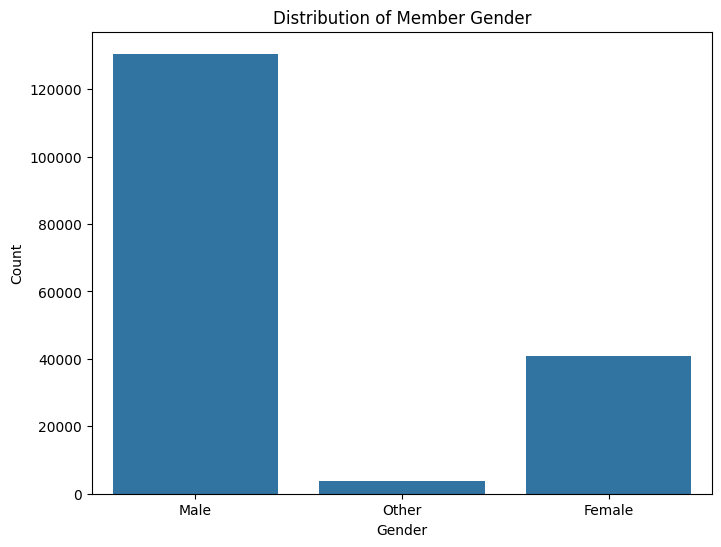

In [102]:
plt.figure(figsize=(8, 6))

#Plot a countplot for the distribution of the member gender.
sns.countplot(data=cleaned_bike_df, x='member_gender')
plt.title('Distribution of Member Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

After investigating the member gender (`member_gender`), it's obvious that 'Male' is the dominant member gender in this dataset with higher than **120k** users by a significant margin compared to 'Female' with around **40k**, and few number defined as 'Other'.

Now, will examine the distribution of the member age (`member_age`), in order to identify the dominant age demographics in the dataset.

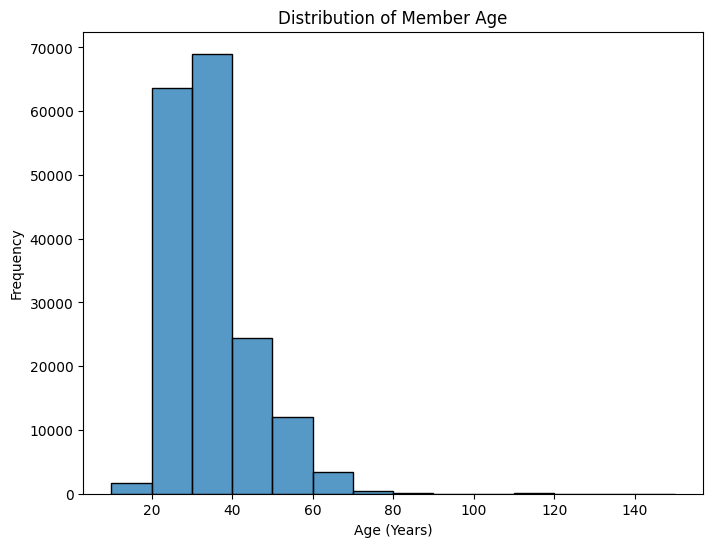

In [103]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 10
bins = np.arange(10, cleaned_bike_df['member_age'].max()+binsize, binsize)

#Plot a histogram for the distribution of the member age. 
sns.histplot(cleaned_bike_df['member_age'], bins=bins)
plt.title('Distribution of Member Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

In [104]:
#Drop rows include member ages over 80.
cleaned_bike_df = cleaned_bike_df[cleaned_bike_df['member_age'] <= 80].reset_index(drop=True)

In [105]:
cleaned_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174747 entries, 0 to 174746
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174747 non-null  int64         
 1   duration_min             174747 non-null  float64       
 2   start_time               174747 non-null  datetime64[ns]
 3   start_hour               174747 non-null  int32         
 4   start_day                174747 non-null  category      
 5   end_time                 174747 non-null  datetime64[ns]
 6   start_station_id         174747 non-null  Int32         
 7   start_station_name       174747 non-null  object        
 8   start_station_latitude   174747 non-null  float64       
 9   start_station_longitude  174747 non-null  float64       
 10  end_station_id           174747 non-null  Int32         
 11  end_station_name         174747 non-null  object        
 12  end_station_lati

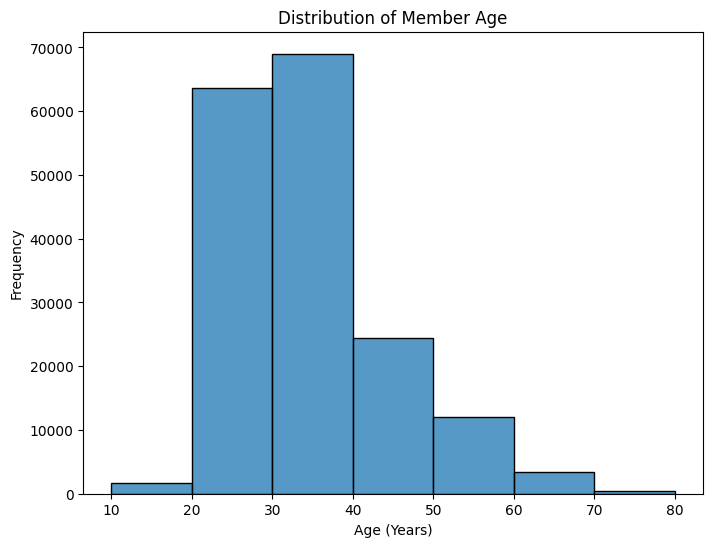

In [106]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 10
bins = np.arange(10, cleaned_bike_df['member_age'].max()+binsize, binsize)

#Plot a histogram for the distribution of the member age. 
sns.histplot(cleaned_bike_df['member_age'], bins=bins)
plt.title('Distribution of Member Age')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

After investigating the member age (`member_age`), we can see that distribution is concentrating in the members with earlier ages between **20s** to **40s**, and very low number of trips for members with older age group.

Then, the distribution of trip start times (`start_hour`) will be analyzed to identify peak usage periods throughout the day.

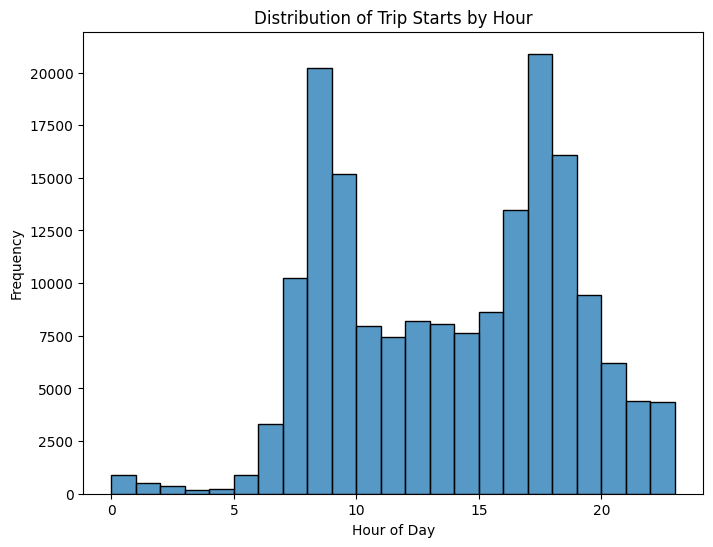

In [107]:
plt.figure(figsize=(8, 6))

#Define the bin size and bins range for the histogram plot.
binsize = 1
bins = np.arange(0, 24, binsize)

#Plot a histogram for the distribution of the trip start hour of the day. 
sns.histplot(data=cleaned_bike_df, x='start_hour', bins=bins)
plt.title('Distribution of Trip Starts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

After investigating the start hour of the day (`start_hour`), we can see that it's a bimodal distribution, which means there are two obvious peaks in this distribution, one in the morning (around 8:00 to 9:00 AM), and another one in the evening (around 5:00 to 6:00 PM). In general, these are the typical hours for work and school commutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1. **Trip Duration:**
    * After investigating the trip duration in seconds shown in the first histogram and the trip duration in minutes shown in the second histogram, the distribution of the trip duration in the dataset is highly right-skewed, and the majority of trips are relatively short (under 20 minutes), with a long tail representing longer durations. 
    * This indicates that there are few long trips, while most trips are short. There are unusual points representing trips that lasted for several hours, which are atypical points comparing to the bulk of the data and can skew the analysis. 
    * A transformation was performed by converting trip duration into minutes in (`duration_min`) instead of (`duration_sec`) and used a logarithmic transformation to normalize the skewed distribution and make the duration more interpretable for human understanding.  
<br>
<br>
2. **User Type:**
    * After investigating the user type (`user_type`), it's obvious that the 'Subscriber' is the dominant user type in this dataset with higher than **150k** users by a significant margin compared to 'Customer' with less than **20k** users. 
    * This leads to the fact of the bike sharing program is utilized by members rather than casual users. 
    * There is no unusual points and no transformation required within this categorial variable.
<br>
<br>
3. **Member Gender:**
    * After investigating the member gender (`member_gender`), it's obvious that 'Male' is the dominant member gender in this dataset with higher than **120k** users by a significant margin compared to 'Female' with around **40k**, and few number defined as 'Other'. 
    * There is no unusual points and no transformation required within this categorial variable.
<br>
<br>
4. **Member Age:**
    * After investigating the member age (`member_age`), we can see that distribution is concentrating in the members with earlier ages between **20s** to **40s**, and very low number of trips for members with older age group. 
    * This indicates that the primary users of this service falls between younger and middle-aged users. 
    * There were unusual points at the most right end of the distribution with very old ages, which could be errors in entry or may be representing a real number for old users utilized of this service. 
    * A necessary transformation was performed, by extracting the member age (`member_age`) from the member birth date (`member_birth_date`), this was achieved by subtracting the (`member_birth_date`) from the current year which is (**2019**) as defined in the dataset. This transformation is important to have the member age which is more interpretable for understanding than using the member birth date itself.
<br>
<br>
5. **Trip Start by Hour:**
    * After investigating the start hour of the day (`start_hour`), we can see that it's a bimodal distribution, which means there are two obvious peaks in this distribution, one in the morning (around 8:00 to 9:00 AM), and another one in the evening (around 5:00 to 6:00 PM). 
    * In general, these are the typical hours for work and school commutes. On the other hand, the trip counts are much lower in the very early morning and late evening.
    * A necessary transformation was performed, by extracting the (`start_hour`) from the (`start_time`) column after converted it to (`datetime`).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* There are unusual points representing trips that lasted for several hours, which are atypical points comparing to the bulk of the data, which could be defined as outliers for many reasons including errors in data entry, I dropped all records including trip duration longer than **1200 minutes**.
* A cleaned dataframe called (`cleaned_bike_df`) was created and missing values 'NaN' in (`member_gender`) were dropped before plotting a countplot to avoid having a 'NaN' category shown in the plot.
* With the exist of unusual points for users with a very old ages which could be defined as outliers, I dropped all records with ages over **80** years to concentrate on trips utilized by the majority age group. 
* I also handled missing values by dropping rows including ('NaN') in both the (`member_birth_date`) and (`member_age`) from the new cleaned dataframe (`cleaned_bike_df`).
* The (`start_time`) column was converted to a (`datetime`) data type instead of (`object`), which allows pandas to extract hours of the day, day of the week, and month of the year.

## Bivariate Exploration

In this section, will investigate relationships between pairs of variables in the bike-sharing dataset. The features of interest in the dataset were investigated in the previous section and provided a cleaned dataset to be used in this section.

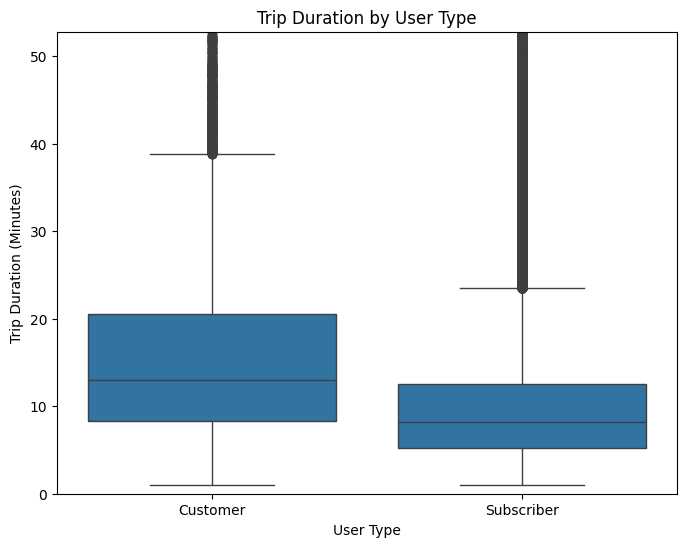

In [108]:
plt.figure(figsize=(8, 6))

#Plot a boxplot to compare trip duration distributions between user types. 
sns.boxplot(data=cleaned_bike_df, x='user_type', y='duration_min')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.ylim(0, cleaned_bike_df['duration_min'].quantile(0.99)) # Limit y-axis for better visibility
plt.show()

Through observing the relationship between the trip duration and user type, it's obvious that there is a significant relationship, where the distribution of 'Customers' average trip duration is longer and wider spread than the average trip duration of 'Subscribers'. 

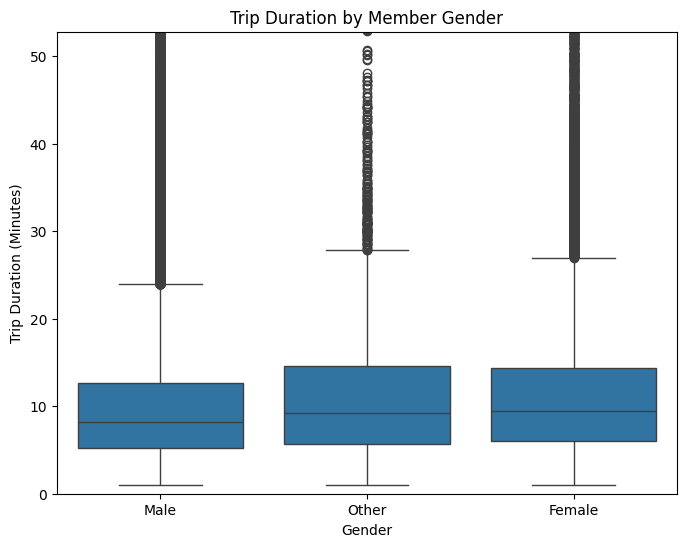

In [109]:
plt.figure(figsize=(8, 6))

#Plot a boxplot to compare trip duration distributions between gender groups. 
sns.boxplot(data=cleaned_bike_df, x='member_gender', y='duration_min')
plt.title('Trip Duration by Member Gender')
plt.xlabel('Gender')
plt.ylabel('Trip Duration (Minutes)')
plt.ylim(0, cleaned_bike_df['duration_min'].quantile(0.99)) # Limit y-axis for better visibility
plt.show()

Through observing the relationship between the trip duration and member gender, it's obvious that in general 'Male' members use the shortest average trip durations. 'Female' and 'Other' gender members prefer to have a slightly longer average trip durations than 'Male' members.

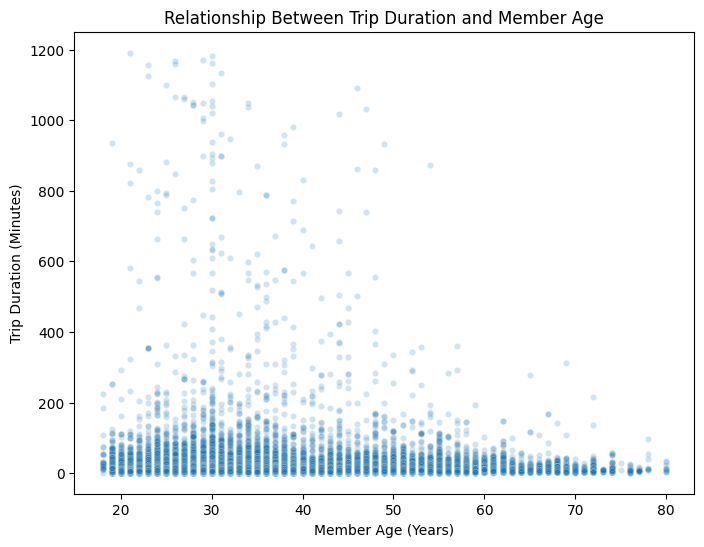

In [110]:
plt.figure(figsize=(8, 6))

#Plot a Scatterplot of trip duration vs. member age.  
sns.scatterplot(data=cleaned_bike_df, x='member_age', y='duration_min',
    alpha=0.2, # Use transparency due to high number of points
    s=20 # Adjust marker size
)
plt.title('Relationship Between Trip Duration and Member Age')
plt.xlabel('Member Age (Years)')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

Through observing the relationship between the trip duration and member age through the scatter plot, it's obvious that in general the majority of trip durations are short and concentrated among members in younger ages between **20s** to **40s** range.

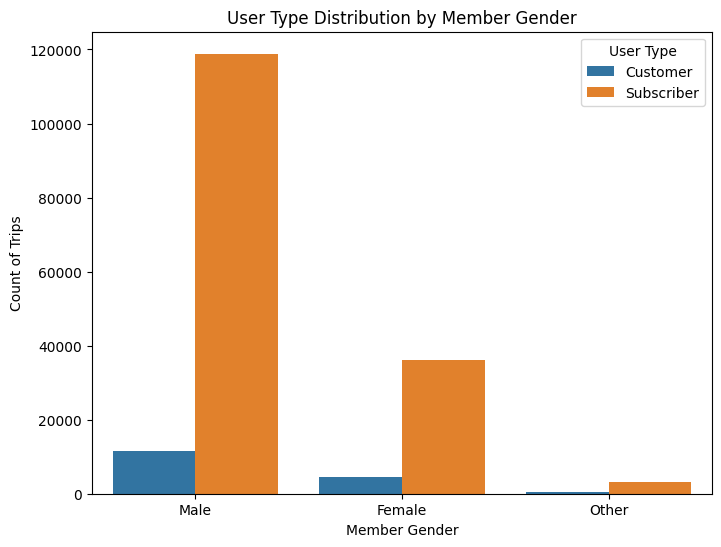

In [111]:
plt.figure(figsize=(8, 6))

#Plot a countplot to visualize the distribution of member genders by user type.
sns.countplot(data=cleaned_bike_df, x='member_gender', hue='user_type',
    order=cleaned_bike_df['member_gender'].value_counts().index # Order by frequency
)
plt.title('User Type Distribution by Member Gender')
plt.xlabel('Member Gender')
plt.ylabel('Count of Trips')
plt.legend(title='User Type')
plt.show()

As observed from the previous clustered bar chart, 'Subscribers' user type for all gender categories make a much higher number of trips compared to 'Customers'. On the other hand, the 'Male' gender group have the highest number of trips for both 'Subscriber' and 'Customer' user type, but there is an obvious difference between number of trips for 'Subscribers' and 'Customers' of the 'Male' gender category.

In [112]:
#Create a pivot table counting trips by 'start_hour' (rows) and 'start_day' (columns).
heatmap_pivot = cleaned_bike_df.groupby(['start_hour', 'start_day'], observed=False).size().unstack(fill_value=0)

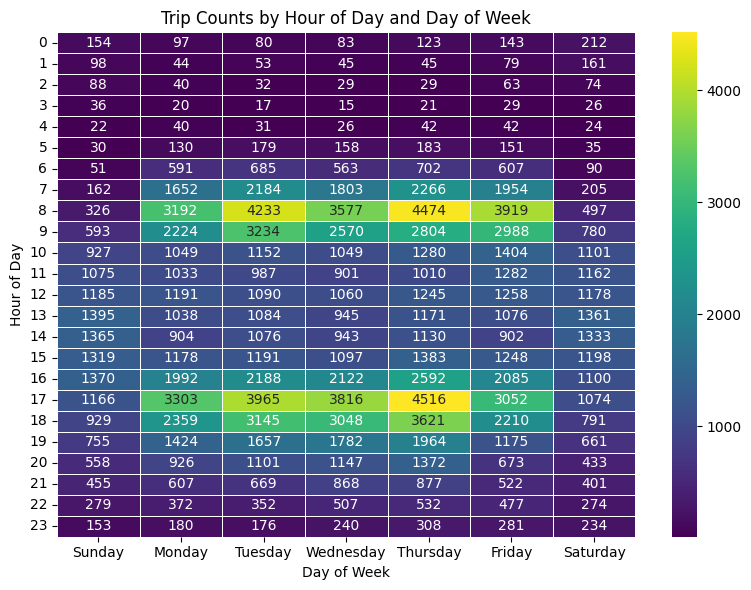

In [113]:
plt.figure(figsize=(8, 6))

#Plot a heatmap to visualize trip frequency patterns by hour and day.
sns.heatmap(
    heatmap_pivot,
    cmap='viridis', # Color map
    annot=True, # Annotate the heatmap with the data values
    fmt='d', # Format annotations as integers
    linewidths=.5 # Add lines between cells
)
plt.title('Trip Counts by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

The heatmap above visualizes the relationship between the hour of the day and the day of the week, through showing the trip counts for each combination. As observed in the heatmap, there are an obvious peak of periods during the weekdays (not weekends), the first period is around 8:00 to 9:00 AM and the second period is around 5:00 to 6:00 PM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* It's obvious that there is a significant relationship between the user type and trip duration, where the distribution of 'Customers' average trip duration is longer and wider spread than the average trip duration of 'Subscribers'. This lead to the fact that 'Subscribers' use the bike-share service for shorter duration, distances and a specified functional trips, while 'Customers' might use it for long durations and distances for experiencing this service. This analysis is achieved from the previous boxplot showing that the trip duration of 'Customers' have a higher median and extend more than the trip duration of 'Subscribers'.
* Through observing the relationship between the trip duration and member gender, it's obvious that in general 'Male' members use the shortest average trip durations. 'Female' and 'Other' gender members prefer to have a slightly longer average trip durations than 'Male' members. This slightly difference is shown in the previous boxplot showing that the average trip duration of 'Male' have a lower median and extend less than the average trip duration of 'Female' and 'Other' genders.
* 'Subscribers' user type for all gender categories make a much higher number of trips compared to 'Customers'. On the other hand, the 'Male' gender group have the highest number of trips for both 'Subscriber' and 'Customer' user type, but there is an obvious difference between number of trips for 'Subscribers' and 'Customers' of the 'Male' gender category. This leads to the fact that the majority of the `bike_sharing_service` members are 'Male'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Through observing the relationship between the trip duration and member age - extracted from the birth date - through the scatter plot, it's obvious that in general the majority of trip durations are short and concentrated among members in younger ages between **20s** to **40s** range. Also, across all observed ages the points cluster density is higher at the lower end of the trip duration. This leads to the fact that short trips are a common behavior accross all age groups. Referring to the scatterplot, there is no strong positive or negative linear correlation between the age group and trip duration, and the distribution of the trip duration is spreaded within the various age groups.
* As observed in the heatmap, there are an obvious peak of periods during the weekdays (not weekends), the first period is around 8:00 to 9:00 AM and the second period is around 5:00 to 6:00 PM. We can see this in the heatmap through the blocks with yellow and light green colors for the mentioned periods from 'Monday' to 'Friday'. In the weekend using this service is spreading throughout the day with a different peak period around 10:00 AM to 3:00 PM. The off-peak hours in all days are starting from 1:00 AM to 4:00 PM.

## Multivariate Exploration

In this section, will investigate relationships between three or more variables in the bike-sharing dataset. The features of interest in the dataset and the relationships between pair of variables were investigated in the previous sections.

<Figure size 1200x700 with 0 Axes>

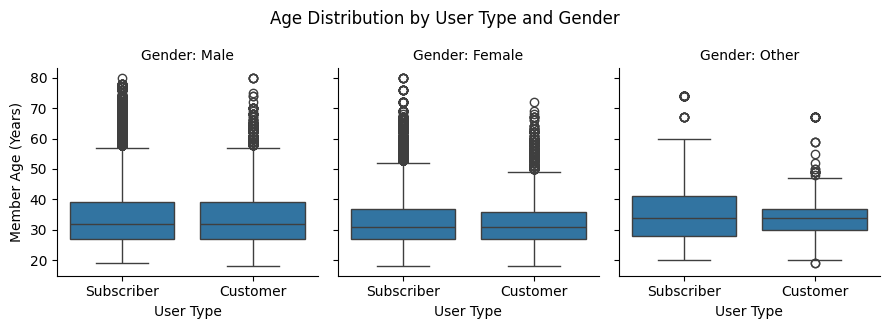

In [114]:
plt.figure(figsize=(12, 7))

#Order both the 'member_gender' and the 'user_type'.
col_order = ['Male', 'Female', 'Other']
user_order = ['Subscriber', 'Customer']

#Create a faceted boxplot to show the age distribution by user type and gender.
g = sns.FacetGrid(data=cleaned_bike_df, col='member_gender', col_order=col_order)
g.map(sns.boxplot, 'user_type','member_age', order=user_order)

g.fig.suptitle('Age Distribution by User Type and Gender', y=1.08)
g.set_axis_labels('User Type', 'Member Age (Years)')
g.set_titles(col_template='Gender: {col_name}')

plt.show()

The facet grid with box plots above visualizes the relationship between member_age, user_type, and member_gender. In the previous chart it's observed that the majority of users in all gender and user type categories fall within the age range between **20s** and **40s** years.

In [115]:
labels=['0-20', '21-40', '41-60', '60+']

#Create a new column called age_group and assign each age to a specific group.
cleaned_bike_df['age_group'] = pd.cut(cleaned_bike_df['member_age'], bins=[0, 20, 40, 60, 80],
                                      labels=labels,
                                      right=False, include_lowest=True)

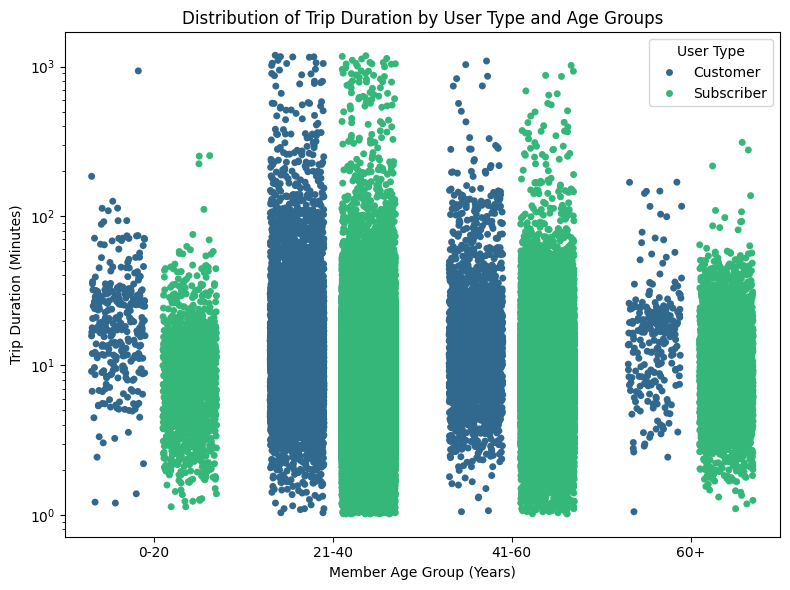

In [116]:
plt.figure(figsize=(8, 6))

#Create a strip plot to visualize the relationship between the member age and trip duration,
#differentiated by user type
sns.stripplot(
    data=cleaned_bike_df,
    x='age_group',
    y='duration_min',
    hue='user_type',
    dodge=True, # Set points for different user types to be placed side-by-side
    jitter=0.3, # Add jitter to reduce overplotting of points
    palette='viridis')

plt.yscale('log') # Apply log scale to the y-axis (Trip Duration)
plt.title('Distribution of Trip Duration by User Type and Age Groups')
plt.xlabel('Member Age Group (Years)')
plt.ylabel('Trip Duration (Minutes)')
plt.legend(title='User Type', loc='upper right')
plt.tight_layout()
plt.show()

Based on the previous strip plot showing the distribution of trip duration by user type and age group, it's obvious that the majority of trips are shorter duration among members in the age range between **20s** to **50s**.

On the other hand, it's obvious that the 'Subscribers' user type represented in (green) form much denser cluster of points in most at the lower end of the trip duration defined in the (y-axis). This confirms that 'Subscribers' in general take shorter and more frequent trips, especially for commuting time periods. While 'Customers' user type represented in (blue) has fewer number of points in the strip plot, with slightly higher trip durations. This leads to the fact that 'Customers' tend to have longer and less frequent trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* In general, 'Subscribers' and 'Customers' have a narrow age distribution, indicating that most trips made by users with age range between late **20s** and early **50s**. Also, the median age for both user types is typically similar. On the other hand, regarding the age distribution by the gender groups, it's obvious that 'Male' users represent the laregest group and their age distribution is same as the ovaerall pattern, with the same peak between young and middle adulthood. 'Female' users represent a similar age distribution with a slightly lower median age and narrower spread for both user types than 'Male' users. Also, the 'Other' gender category shows a slightly higher median age with narrower spread for both user types than both gender categories, despite of haveing a smaller number of users.
* There is no strong positive or negative linear correlation between the age group and trip duration, and the distribution of the trip duration is spreaded within the various age groups, even across both user types.
* The `user_type` feature significantly strengthened the investigation into the relationship between `member_age` and `trip_duration`. 

### Were there any interesting or surprising interactions between features?

* When we look at age how is distributed among bike-share users, understanding both their type (like subscriber or customer) and their gender together gives a much clearer picture than looking at age with just one of those features separately.
* At the end, we can conclude that the `user_type` besides the `member_age` features provide a stronger indicator of the trip duration than `member_age` alone.

## Conclusions

In this part of the project, the data exploration process followed the following steps:
1. Loading the dataset manually, then perform the following dataset cleaning and feature engineering steps:
    * Convert the data type for both the `start_time` and the `end_time` from `object` to `datetime`.
    * Create a new column in the dataframe called `start_hour`, through extracting the hour from a datetime.
    * Create a new column in the dataframe called `start_day`, through extracting the day name from a datetime. Then reorder the days of the week starting from 'Sunday' to 'Saturday', and convert it's data type into Category.
    * Create a new column in the dataframe called `duration_min`, includes the trip duration in minutes. Values in this column were calculated by deviding values in the `duration_min` by 60.
    * Create a new column in the dataframe called `member_age`, includes the age of each member. Values in this column were calculated by substracting values in the `member_birth_year` from the current year of the data collection, which was (**2019**).
    * Convert the data type of `start_station_id`, `end_station_id`, `member_birth_year` and `member_age` from `float64` into `Int32`.
    * Reorder the new created columns to be next to the column extracted from.
    * Create a new cleaned dataframe called `created_bike_df` from the original dataframe `bike_df`, excluding all records with Null values in any column.
2. Started investigating the distribution of individual features using univariate visualizations. The used visualizations in this section were histograms for investigating the distribution of the trip duration in seconds and minutes, `member_age` and `start_hour`, besides having countplots for investigating the distribution of `user_type` and `member_gender`.
3. In the bivariate visualizations section, I investigated relationships between two variables, using boxplots to compare trip duration `duration_min` distributions between user types `user_type`, and to compare trip duration `duration_min` distributions between gender groups `member_gender`. Also, scatter plot was used to provide investigation of `duration_min` vs. `member_age`. Then I used a clustered bar chart to visualize the distribution of `member_gender` by `user_type`. A heatmap was used to visualize trip frequency patterns by `start_hour` and `start_day`.
4. The last section including multivariate analysis, the exploration of relationships between three or more variables were provided, so a facet grid with boxplot was used to show the age distribution by user type and gender. Then, used a scatter plot with multiple encodings to visualize the relationship between `member_age` and `duration_min`.

The following are the summary of the main findings from the data exploration:
   * Most bike trips are short, but casual 'Customers' consistently take significantly longer trips than 'Subscribers'. Trip durations for 'Subscribers' tend to shorten during weekday commute hours, while 'Customers' trips can remain long even then.
   * Trips are far more common on weekdays, especially Tuesdays through Thursdays, indicating a strong commuter base. Daily activity peaks during morning (8-9 AM) and evening (5-6 PM) commute hours, with minimal overnight use.
   * 'Subscribers' make up most users and typically take short, functional trips, while the smaller group of 'Customers' take longer, more recreational trips.
   * 'Male' users, particularly 'Subscribers', are the most numerous. The core user base is aged between **20s** and **40s**, while age doesn't strongly dictate trip duration, 'Subscribers' ages are more concentrated than 'Customers', who show a wider range.

In [117]:
#Save the used and generated cleaned dataframe into CSV file in the same path.
cleaned_bike_df.to_csv('cleaned-fordgobike-tripdata.csv', index=False)

In [118]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Part_I_exploration_ford-gobike-system.ipynb

[NbConvertApp] Converting notebook Part_I_exploration_ford-gobike-system.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 15 image(s).
[NbConvertApp] Writing 1298277 bytes to Part_I_exploration_ford-gobike-system.html
